# Introdution

### ONLINE EDUCATION SYSTEM

This dataset provides a basic overview of the online education system in India.

The dataset includes various factors such as gender, home location, level of education, age, device usage, economic status, family size, internet accessibility, sports involvement, elderly care, sleep patterns, social media usage, gaming interests, study environment, group studies, academic performance, online interaction, doubt clarification, learning preferences, and satisfaction levels.


    I will start importing the libraries that I will use during data analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('ONLINE EDUCATION SYSTEM.csv')

After downloading the CSV file I chose, we use Pandas' CSV read function, so I can get a general idea of ​​our dataset by calling the first 5 rows with the head function.

## Exploratory Data Analysis (EDA)

In [3]:
df.head()

,Gender,Home Location,Level of Education,Age(Years),Number of Subjects,Device type used to attend classes,Economic status,Family size,Internet facility in your locality,Are you involved in any sports?,...,Time spent on social media (Hours),Interested in Gaming?,Have separate room for studying?,Engaged in group studies?,Average marks scored before pandemic in traditional classroom,Your interaction in online mode,Clearing doubts with faculties in online mode,Interested in?,Performance in online,Your level of satisfaction in Online Education
0,Male,Urban,Under Graduate,18,11,Laptop,Middle Class,4,5,No,...,1,No,No,No,91-100,1,1,Practical,6,Average
1,Male,Urban,Under Graduate,19,7,Laptop,Middle Class,4,1,Yes,...,1,Yes,Yes,No,91-100,1,1,Theory,3,Bad
2,Male,Rural,Under Graduate,18,5,Laptop,Middle Class,5,2,No,...,1,No,Yes,No,71-80,1,1,Both,6,Bad
3,Male,Urban,Under Graduate,18,5,Laptop,Middle Class,4,4,Yes,...,2,No,No,yes,91-100,1,2,Theory,4,Bad
4,Male,Rural,Under Graduate,18,5,Laptop,Middle Class,4,3,No,...,2,Yes,Yes,yes,81-90,3,3,Both,6,Average


Below we can see the Dtype of the resources and if the dataframe has any missing values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1033 entries, 0 to 1032
Data columns (total 23 columns):
 #   Column                                                         Non-Null Count  Dtype 
---  ------                                                         --------------  ----- 
 0   Gender                                                         1033 non-null   object
 1   Home Location                                                  1033 non-null   object
 2   Level of Education                                             1033 non-null   object
 3   Age(Years)                                                     1033 non-null   int64 
 4   Number of Subjects                                             1033 non-null   int64 
 5   Device type used to attend classes                             1033 non-null   object
 6   Economic status                                                1033 non-null   object
 7   Family size                                                    1033 n

Now I will take a look at the correlations between the numerical characteristics of my target which is the Satisfaction Level and performance in the online study.

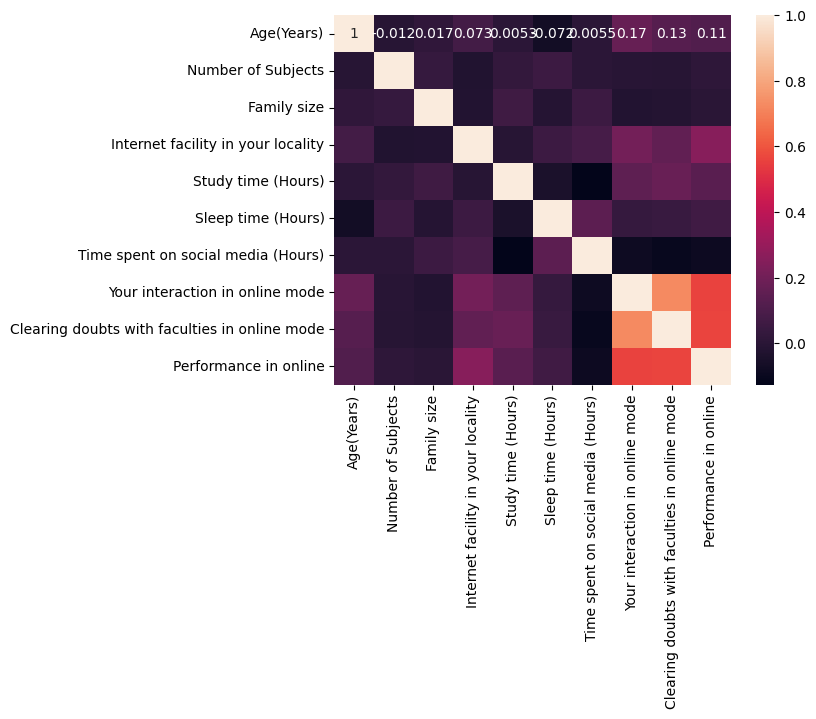

In [5]:
sns.heatmap(df.corr(numeric_only = True),annot=True)
plt.show()

In [6]:
df2=df.select_dtypes(exclude=object)

In [7]:
df2.corr()

,Age(Years),Number of Subjects,Family size,Internet facility in your locality,Study time (Hours),Sleep time (Hours),Time spent on social media (Hours),Your interaction in online mode,Clearing doubts with faculties in online mode,Performance in online
Age(Years),1.000000,-0.011505,0.016893,0.072625,0.005344,-0.072031,0.005455,0.171943,0.125559,0.114965
Number of Subjects,-0.011505,1.000000,0.035997,-0.025915,0.024280,0.051531,0.004833,-0.005144,-0.008595,0.012740
Family size,0.016893,0.035997,1.000000,-0.020996,0.060614,-0.015787,0.053512,-0.024268,-0.019461,0.001549
Internet facility in your locality,0.072625,-0.025915,-0.020996,1.000000,-0.011554,0.051838,0.082772,0.204391,0.158990,0.257339
Study time (Hours),0.005344,0.024280,0.060614,-0.011554,1.000000,-0.044385,-0.125986,0.148859,0.175169,0.134344
Sleep time (Hours),-0.072031,0.051531,-0.015787,0.051838,-0.044385,1.000000,0.144587,0.032598,0.043402,0.065020
Time spent on social media (Hours),0.005455,0.004833,0.053512,0.082772,-0.125986,0.144587,1.000000,-0.083972,-0.101847,-0.086568
Your interaction in online mode,0.171943,-0.005144,-0.024268,0.204391,0.148859,0.032598,-0.083972,1.000000,0.723216,0.557507
Clearing doubts with faculties in online mode,0.125559,-0.008595,-0.019461,0.158990,0.175169,0.043402,-0.101847,0.723216,1.000000,0.561091
Performance in online,0.114965,0.012740,0.001549,0.257339,0.134344,0.065020,-0.086568,0.557507,0.561091,1.000000


The results furthest from 1 are the least related to my objective.

In [8]:
df2.corr().style.background_gradient(cmap="Blues")

,Age(Years),Number of Subjects,Family size,Internet facility in your locality,Study time (Hours),Sleep time (Hours),Time spent on social media (Hours),Your interaction in online mode,Clearing doubts with faculties in online mode,Performance in online
Age(Years),1.000000,-0.011505,0.016893,0.072625,0.005344,-0.072031,0.005455,0.171943,0.125559,0.114965
Number of Subjects,-0.011505,1.000000,0.035997,-0.025915,0.024280,0.051531,0.004833,-0.005144,-0.008595,0.012740
Family size,0.016893,0.035997,1.000000,-0.020996,0.060614,-0.015787,0.053512,-0.024268,-0.019461,0.001549
Internet facility in your locality,0.072625,-0.025915,-0.020996,1.000000,-0.011554,0.051838,0.082772,0.204391,0.158990,0.257339
Study time (Hours),0.005344,0.024280,0.060614,-0.011554,1.000000,-0.044385,-0.125986,0.148859,0.175169,0.134344
Sleep time (Hours),-0.072031,0.051531,-0.015787,0.051838,-0.044385,1.000000,0.144587,0.032598,0.043402,0.065020
Time spent on social media (Hours),0.005455,0.004833,0.053512,0.082772,-0.125986,0.144587,1.000000,-0.083972,-0.101847,-0.086568
Your interaction in online mode,0.171943,-0.005144,-0.024268,0.204391,0.148859,0.032598,-0.083972,1.000000,0.723216,0.557507
Clearing doubts with faculties in online mode,0.125559,-0.008595,-0.019461,0.158990,0.175169,0.043402,-0.101847,0.723216,1.000000,0.561091
Performance in online,0.114965,0.012740,0.001549,0.257339,0.134344,0.065020,-0.086568,0.557507,0.561091,1.000000


I can see that if the student has had some type of online interaction or clearing doubts with faculties, there may be some correlation with our target, as well as the number of hours they spend studying.

I'll drop the columns with less correlation with my target. 

In [9]:
df3= df.drop(columns=['Time spent on social media (Hours)','Number of Subjects','Sleep time (Hours)','Family size','Are you involved in any sports?','Interested in Gaming?','Average marks scored before pandemic in traditional classroom'])

In [10]:
df3.head()

,Gender,Home Location,Level of Education,Age(Years),Device type used to attend classes,Economic status,Internet facility in your locality,Do elderly people monitor you?,Study time (Hours),Have separate room for studying?,Engaged in group studies?,Your interaction in online mode,Clearing doubts with faculties in online mode,Interested in?,Performance in online,Your level of satisfaction in Online Education
0,Male,Urban,Under Graduate,18,Laptop,Middle Class,5,Yes,3,No,No,1,1,Practical,6,Average
1,Male,Urban,Under Graduate,19,Laptop,Middle Class,1,Yes,7,Yes,No,1,1,Theory,3,Bad
2,Male,Rural,Under Graduate,18,Laptop,Middle Class,2,Yes,6,Yes,No,1,1,Both,6,Bad
3,Male,Urban,Under Graduate,18,Laptop,Middle Class,4,Yes,3,No,yes,1,2,Theory,4,Bad
4,Male,Rural,Under Graduate,18,Laptop,Middle Class,3,No,8,Yes,yes,3,3,Both,6,Average


Below I checked if my dataset has some null or missing values.

In [11]:
df3.isnull().sum()

Gender                                            0
Home Location                                     0
Level of Education                                0
Age(Years)                                        0
Device type used to attend classes                0
Economic status                                   0
Internet facility in your locality                0
Do elderly people monitor you?                    0
Study time (Hours)                                0
Have separate room for studying?                  0
Engaged in group studies?                         0
Your interaction in online mode                   0
Clearing doubts with faculties in online mode     0
Interested in?                                    0
Performance in online                             0
Your level of satisfaction in Online Education    0
dtype: int64

And now if there is some duplicated values

In [12]:
duplicated=df3.duplicated().sum()
print(duplicated)

3


So, there are 3 duplicates I'll drop them. 

In [13]:
df3.drop_duplicates(inplace=True)

In [14]:
df3.shape

(1030, 16)

I'll rename some columns

In [15]:
df3.rename(columns={'Age(Years)': 'Age','Device type used to attend classes':'Device type Used','Clearing doubts with faculties in online mode':'Clearing doubts','Your level of satisfaction in Online Education':'Level of Satisfaction','Do elderly people monitor you?':'Monitoring for the elderly','Have separate room for studying?':'Separate room for Studying','Engaged in group studies?':'Group Studies','Interested in?':'Learning Method'}, inplace=True)

In [16]:
df3.head()

,Gender,Home Location,Level of Education,Age,Device type Used,Economic status,Internet facility in your locality,Monitoring for the elderly,Study time (Hours),Separate room for Studying,Group Studies,Your interaction in online mode,Clearing doubts,Learning Method,Performance in online,Level of Satisfaction
0,Male,Urban,Under Graduate,18,Laptop,Middle Class,5,Yes,3,No,No,1,1,Practical,6,Average
1,Male,Urban,Under Graduate,19,Laptop,Middle Class,1,Yes,7,Yes,No,1,1,Theory,3,Bad
2,Male,Rural,Under Graduate,18,Laptop,Middle Class,2,Yes,6,Yes,No,1,1,Both,6,Bad
3,Male,Urban,Under Graduate,18,Laptop,Middle Class,4,Yes,3,No,yes,1,2,Theory,4,Bad
4,Male,Rural,Under Graduate,18,Laptop,Middle Class,3,No,8,Yes,yes,3,3,Both,6,Average


I'm going to draw some graphs to get a better view of my data set

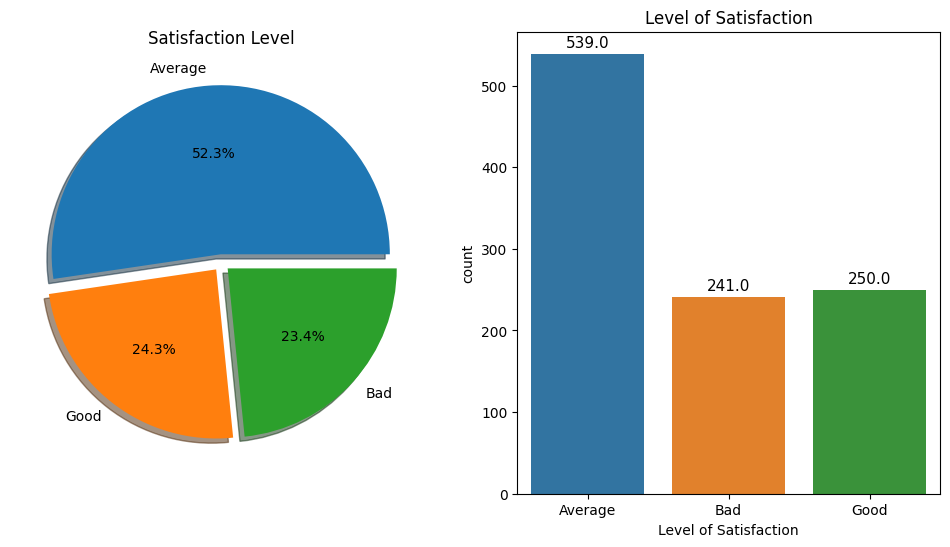

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

df3["Level of Satisfaction"].value_counts().plot(kind="pie", explode=[0.05, 0.05,  0.05], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title("Satisfaction Level")
ax[0].set_ylabel('')

count = sns.countplot(x="Level of Satisfaction", data=df3, ax=ax[1])
for bar in count.patches:
    count.annotate(format(bar.get_height()),
        (bar.get_x() + bar.get_width() / 2,
        bar.get_height()), ha='center', va='center',
        size=11, xytext=(0, 8),
        textcoords='offset points')
ax[1].set_title("Level of Satisfaction")
plt.show()

As we can see, this dataset is imbalanced.

More than 50% (539) of students in this dataset have average satisfaction, 24,3% (251) have a good satisfaction, and  23,4% (241) of students have bad satisfaction in online education.

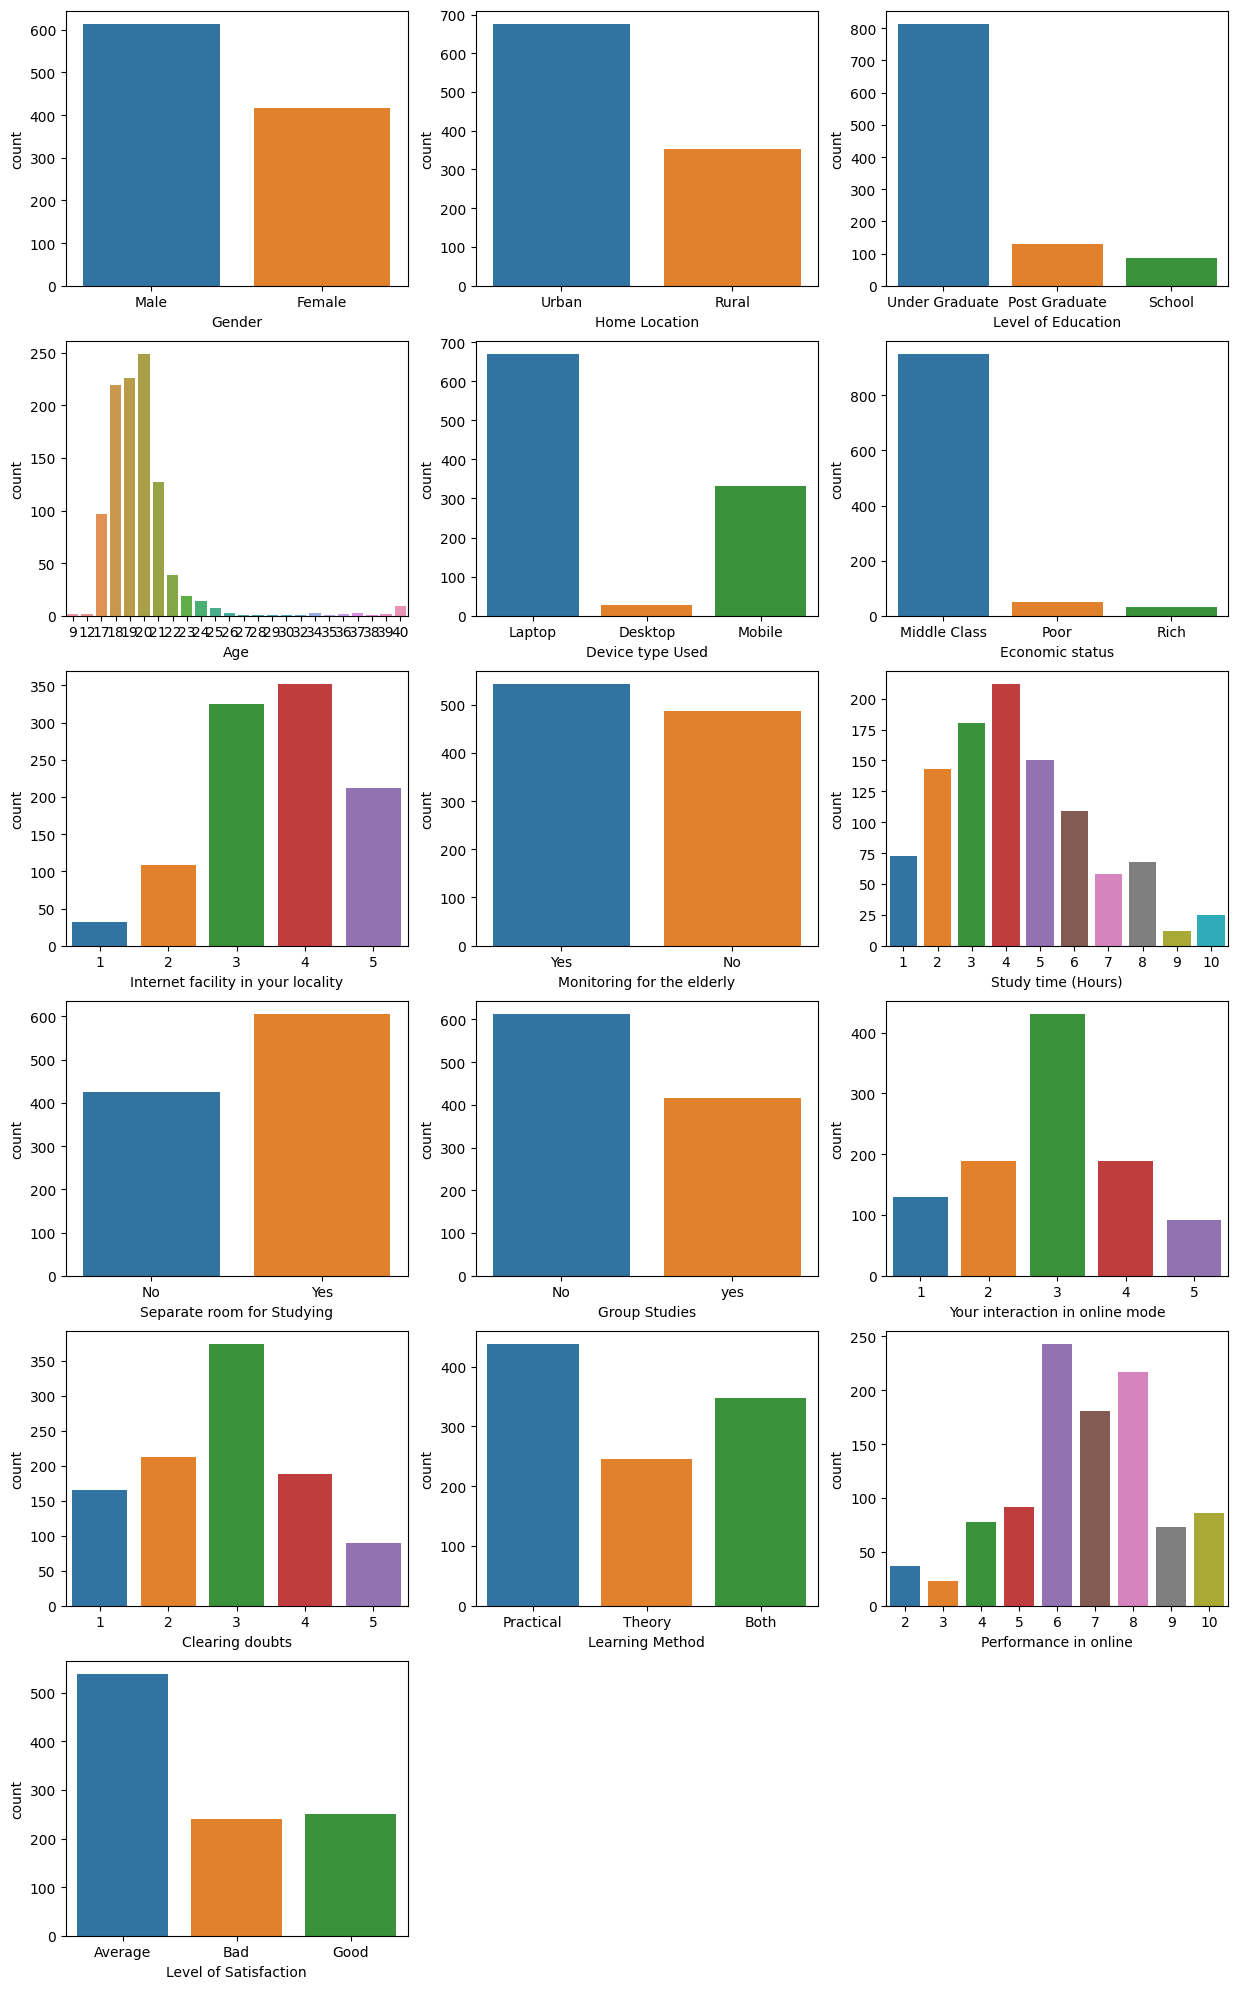

In [18]:
i = 1
plt.figure(figsize = (15,25))
for feature in df3:
    plt.subplot(6,3,i)
    sns.countplot(x = feature ,  data = df3)
    i +=1

There are more males than females in this dataset with an age distribution ranging from 9 to 40 years. Most of them live in the city area and have a moderate financial condition. Most of them are in a graduate program. We can see that most of the study has around 3 a 4 hours of studying and some of them have a separate room for studying. These students mostly use laptops to do online learning.

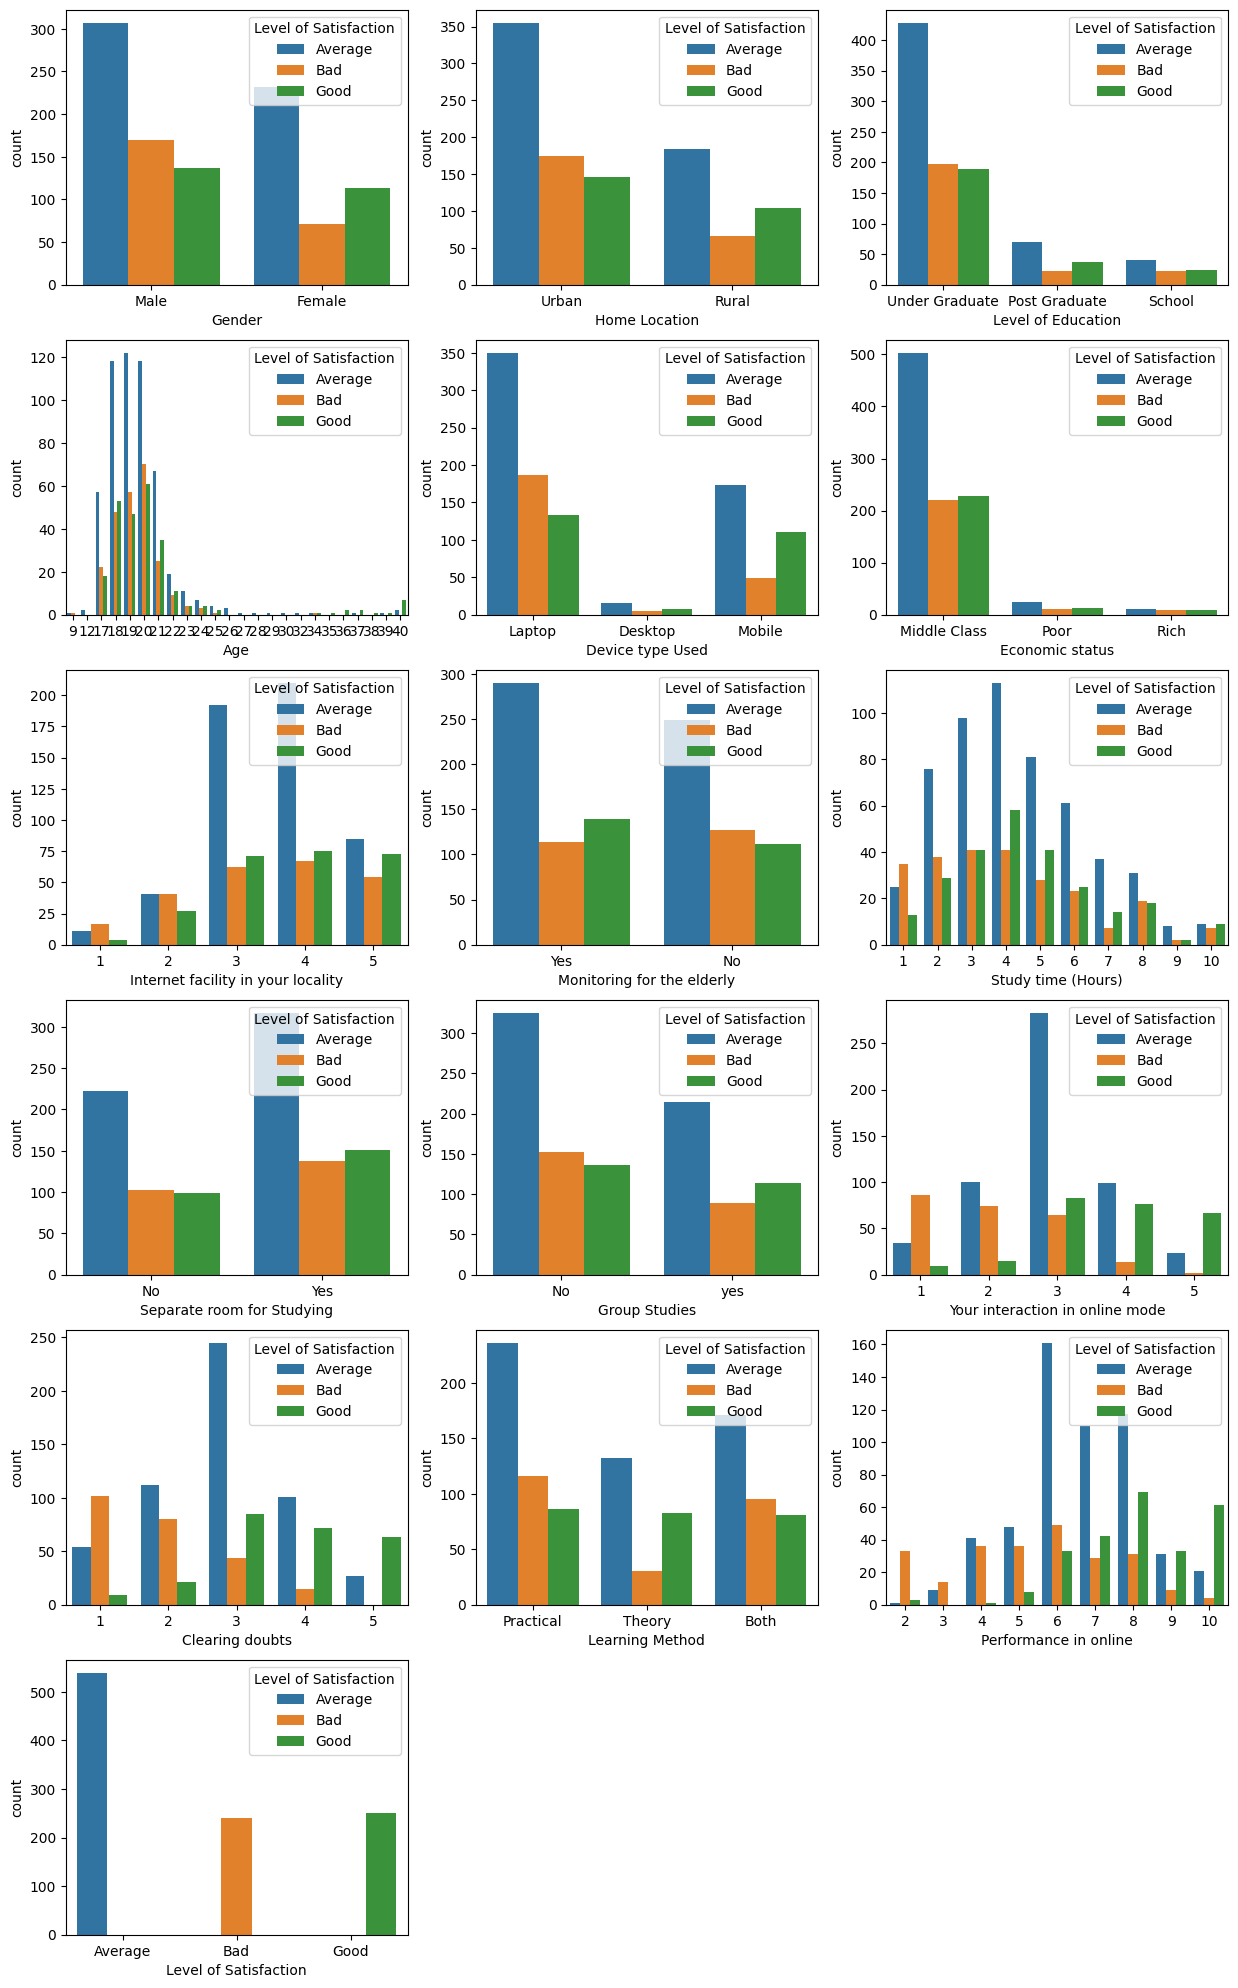

In [19]:
i = 1
plt.figure(figsize = (15,25))
for feature in df3:
    plt.subplot(6,3,i)
    sns.countplot(x = feature , hue='Level of Satisfaction', data = df3)
    i +=1

Now I will check some correlation between some features to understand our dataset.

In [20]:
pd.crosstab(df3["Home Location"], df3["Economic status"]).style.background_gradient(cmap='Blues')

Economic status,Middle Class,Poor,Rich
Home Location,,,
Rural,316,35,3
Urban,635,14,27


Here we can see that the majority of students are from urban areas and middle class.

Below I will check the correlation between the level of satisfaction and online performance, and we can see that the majority of students who performed well online have average satisfaction.

In [21]:
pd.crosstab(df3["Performance in online"], df3["Level of Satisfaction"]).style.background_gradient(cmap='Blues')

Level of Satisfaction,Average,Bad,Good
Performance in online,,,
2,1,33,3
3,9,14,0
4,41,36,1
5,48,36,8
6,161,49,33
7,110,29,42
8,117,31,69
9,31,9,33
10,21,4,61


Below we can see that the more you interact in classes, the better your performance online.

In [22]:
pd.crosstab(df3["Your interaction in online mode"], df3["Performance in online"]).style.background_gradient(cmap='Blues')

Performance in online,2,3,4,5,6,7,8,9,10
Your interaction in online mode,,,,,,,,,
1,31,10,20,14,23,9,18,1,3
2,4,9,29,31,46,28,25,11,6
3,2,4,24,43,140,103,85,17,13
4,0,0,5,3,29,35,74,26,17
5,0,0,0,1,5,6,15,18,47


In [23]:
pd.crosstab(df3["Your interaction in online mode"], df3["Level of Satisfaction"]).style.background_gradient(cmap='Blues')

Level of Satisfaction,Average,Bad,Good
Your interaction in online mode,,,
1,34,86,9
2,100,74,15
3,283,65,83
4,99,14,76
5,23,2,67


In the next correlation we can see that even though there are fewer women in this dataset, they have greater interaction in classes.

In [24]:
pd.crosstab([df3["Gender"], df3["Clearing doubts"]], df3["Level of Satisfaction"]).style.background_gradient(cmap='Blues')

I will split two different datasets, one with the target as satisfaction level and one with online performance as the target.

In [25]:
df3.head(2)

,Gender,Home Location,Level of Education,Age,Device type Used,Economic status,Internet facility in your locality,Monitoring for the elderly,Study time (Hours),Separate room for Studying,Group Studies,Your interaction in online mode,Clearing doubts,Learning Method,Performance in online,Level of Satisfaction
0,Male,Urban,Under Graduate,18,Laptop,Middle Class,5,Yes,3,No,No,1,1,Practical,6,Average
1,Male,Urban,Under Graduate,19,Laptop,Middle Class,1,Yes,7,Yes,No,1,1,Theory,3,Bad


I will copy my df3 dataset to a new one to start building the dataset to apply the machine learning models

In [26]:
df_1=df3

### Encoding Ordinal and Nominal Variable to check the correlation with the target

In [34]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

Gender = enc.fit_transform(df_1['Gender'])
HomeLocation = enc.fit_transform(df_1['Home Location'])
LevelofEducation= enc.fit_transform(df_1['Level of Education'])
DevicetypeUsed = enc.fit_transform(df_1['Device type Used'])
Economicstatus = enc.fit_transform(df_1['Economic status'])
Monitoringfortheelderly = enc.fit_transform(df_1['Monitoring for the elderly'])
SeparateroomforStudying = enc.fit_transform(df_1['Separate room for Studying'])
GroupStudies=enc.fit_transform(df_1['Group Studies'])
LearningMethod=enc.fit_transform(df_1['Learning Method'])
LevelofSatisfaction=enc.fit_transform(df_1['Level of Satisfaction'])

df_1['Home Location'] = HomeLocation
df_1['Level of Education'] = LevelofEducation
df_1['Device type Used'] = DevicetypeUsed
df_1['Economic status'] = Economicstatus
df_1['Monitoring for the elderly'] = Monitoringfortheelderly
df_1['Separate room for Studying'] = SeparateroomforStudying
df_1['Group Studies'] = GroupStudies
df_1['Learning Method']= LearningMethod
df_1['Level of Satisfaction']= LevelofSatisfaction
df_1['Gender'] = Gender

In [35]:
df_1.head()

,Gender,Home Location,Level of Education,Age,Device type Used,Economic status,Internet facility in your locality,Monitoring for the elderly,Study time (Hours),Separate room for Studying,Group Studies,Your interaction in online mode,Clearing doubts,Learning Method,Performance in online,Level of Satisfaction
0,1,1,2,18,1,0,5,1,3,0,0,1,1,1,6,0
1,1,1,2,19,1,0,1,1,7,1,0,1,1,2,3,1
2,1,0,2,18,1,0,2,1,6,1,0,1,1,0,6,1
3,1,1,2,18,1,0,4,1,3,0,1,1,2,2,4,1
4,1,0,2,18,1,0,3,0,8,1,1,3,3,0,6,0


In [ ]:
#df4= pd.get_dummies(df4)

In [ ]:
#df4.head(2)

In [ ]:
df4.info()

I'll check again the correlation level between the features with my targets and drop the columns with less correlation.

In [36]:
df_1.corr().style.background_gradient(cmap="Blues")

,Gender,Home Location,Level of Education,Age,Device type Used,Economic status,Internet facility in your locality,Monitoring for the elderly,Study time (Hours),Separate room for Studying,Group Studies,Your interaction in online mode,Clearing doubts,Learning Method,Performance in online,Level of Satisfaction
Gender,1.000000,-0.066553,-0.003854,-0.044390,-0.055789,-0.020124,-0.068390,-0.026519,-0.086281,0.019111,-0.058774,-0.137730,-0.120331,-0.137405,-0.109350,0.005436
Home Location,-0.066553,1.000000,0.013156,0.004640,-0.267284,-0.018497,0.283445,0.023024,-0.057927,0.092528,0.038807,-0.071127,-0.093477,-0.133418,-0.009535,-0.047654
Level of Education,-0.003854,0.013156,1.000000,-0.341420,-0.015200,0.034325,0.053619,0.005311,0.055237,0.014283,-0.069938,-0.058501,-0.049321,-0.032230,-0.002339,-0.023494
Age,-0.044390,0.004640,-0.341420,1.000000,-0.031812,-0.009185,0.073681,-0.040458,0.003956,0.025078,0.110023,0.174076,0.128206,-0.122252,0.116797,0.117089
Device type Used,-0.055789,-0.267284,-0.015200,-0.031812,1.000000,0.012716,-0.228009,-0.043062,-0.028219,-0.204697,-0.011166,0.101432,0.125829,0.144812,0.037796,0.068411
Economic status,-0.020124,-0.018497,0.034325,-0.009185,0.012716,1.000000,0.075488,-0.037118,-0.021956,-0.061203,-0.005712,0.040084,0.039567,-0.003984,0.026592,0.043680
Internet facility in your locality,-0.068390,0.283445,0.053619,0.073681,-0.228009,0.075488,1.000000,0.034325,-0.011732,0.217737,0.038315,0.202479,0.156713,-0.063315,0.255310,0.043598
Monitoring for the elderly,-0.026519,0.023024,0.005311,-0.040458,-0.043062,-0.037118,0.034325,1.000000,0.087713,0.049496,0.083844,0.105652,0.112535,0.025284,0.092354,0.003181
Study time (Hours),-0.086281,-0.057927,0.055237,0.003956,-0.028219,-0.021956,-0.011732,0.087713,1.000000,0.084608,0.011818,0.149614,0.176726,-0.014177,0.134964,0.010488
Separate room for Studying,0.019111,0.092528,0.014283,0.025078,-0.204697,-0.061203,0.217737,0.049496,0.084608,1.000000,0.079007,0.075973,0.066134,-0.057712,0.077640,0.009597


Deleting columns with the least relationship to my target

In [37]:
df_1=df_1.drop(columns=['Home Location','Level of Education','Device type Used','Economic status','Monitoring for the elderly','Separate room for Studying','Learning Method'])

In [39]:
df_1.head(2)

,Gender,Age,Internet facility in your locality,Study time (Hours),Group Studies,Your interaction in online mode,Clearing doubts,Performance in online,Level of Satisfaction
0,1,18,5,3,0,1,1,6,0
1,1,19,1,7,0,1,1,3,1


In [43]:
#df_no_label=df_1.drop(['Level of Satisfaction'], axis=1)

In [45]:
#from sklearn.decomposition import PCA
#pca = PCA().fit(df_no_label)
#plt.plot(np.cumsum(pca.explained_variance_ratio_))
#plt.xlabel('number of components')
#plt.ylabel('cumulative explained variance');

# Machine Learning

My next step is to divide the data into “attributes” and “labels”.
Attributes are the independent variables while labels are dependent variables whose values
are to be predicted.

In [46]:
X = df_1.drop(['Level of Satisfaction'], axis=1)
y = df_1['Level of Satisfaction']

In [47]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size = 0.3,  random_state = 1) # 70% training and 30% test

In [48]:
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1030, 8), (1030,), (721, 8), (309, 8), (721,), (309,))

In [49]:
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [50]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('RF', RandomForestClassifier(n_estimators=100)))

In [51]:
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.611758 (0.064640)
LDA: 0.628387 (0.061050)
KNN: 0.578425 (0.050316)
CART: 0.529775 (0.025887)
NB: 0.618607 (0.077759)
SVM: 0.632553 (0.054478)
RF: 0.586739 (0.063174)


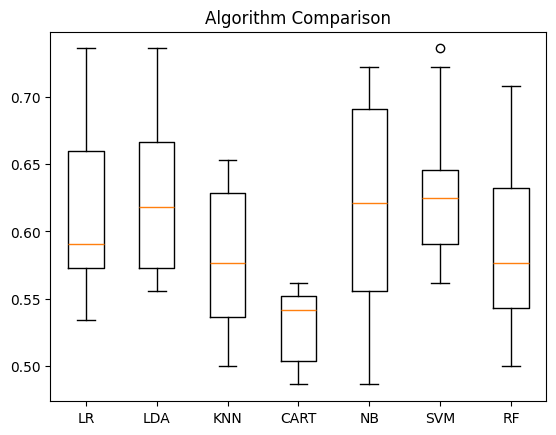

In [52]:
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [53]:
from sklearn.tree import plot_tree
dt_classifier = DecisionTreeClassifier(max_depth = 5, random_state=42)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [54]:
y_pred = dt_classifier.predict(X_test)
result_df = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
print(result_df)

     Actual  Predicted
0         0          0
1         0          0
2         1          0
3         1          0
4         2          0
..      ...        ...
304       0          0
305       0          1
306       0          0
307       0          0
308       0          0

[309 rows x 2 columns]


In [55]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [ ]:
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Plot the Decision Tree

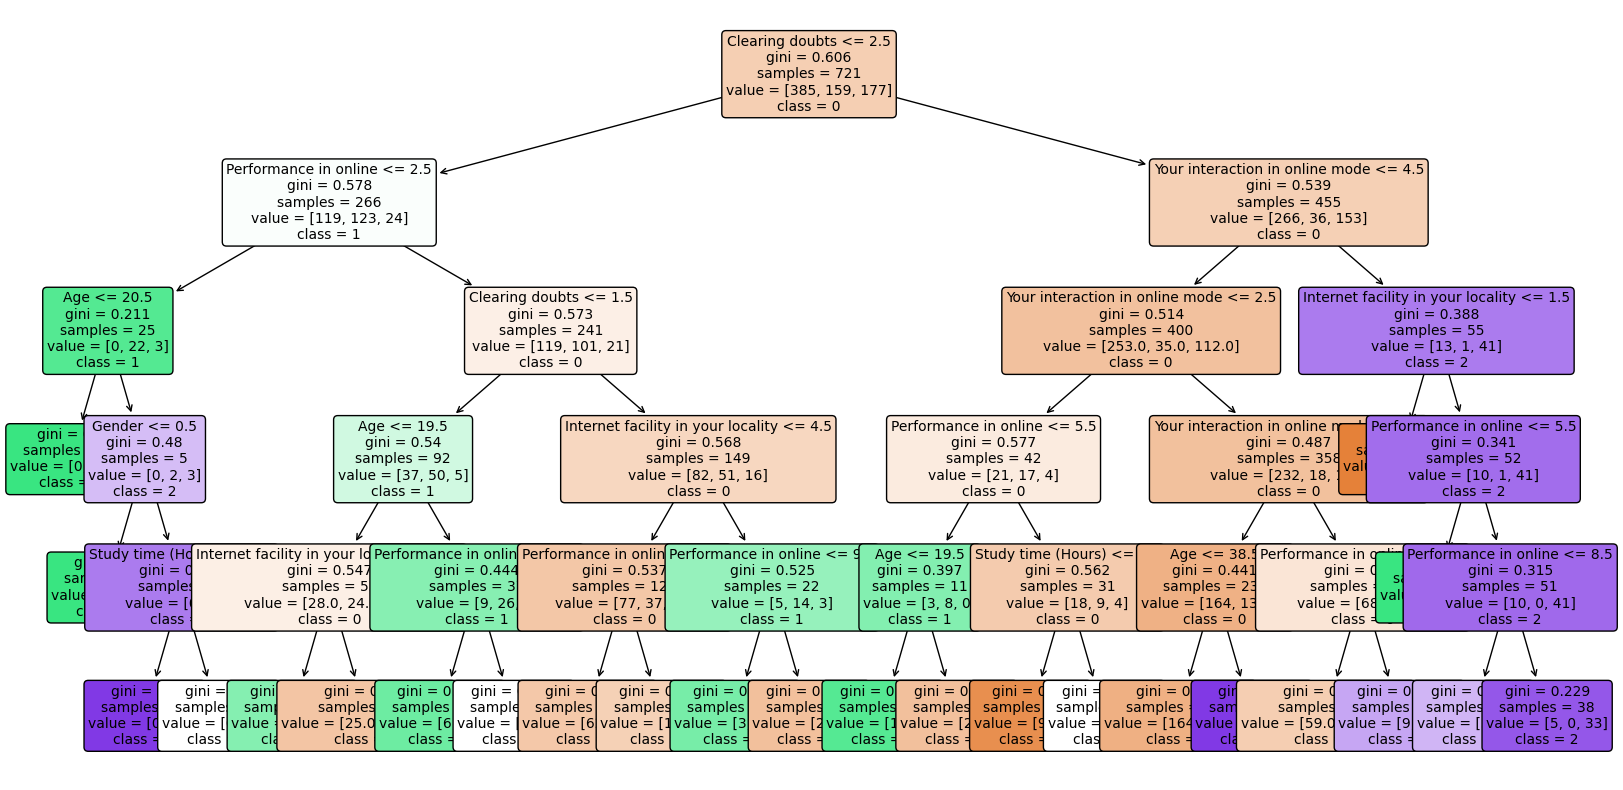

In [58]:
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, filled=True, feature_names=X.columns.tolist(), class_names=df_1['Level of Satisfaction'].unique().astype(str).tolist(), rounded=True, fontsize=10)
plt.show()

In [59]:
def get_cv_scores(model):
    scores = cross_val_score(model,
                             X_train,
                             y_train,
                             cv = 10,
                             scoring='r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

In [67]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.6310679611650486


Então, em resumo, a média da validação cruzada representa o desempenho médio do modelo ao longo de várias iterações de validação cruzada, enquanto o desvio padrão indica a variabilidade desse desempenho entre as iterações. Quanto menor o desvio padrão, mais consistente é o desempenho do modelo em diferentes conjuntos de dados de validação cruzada.

In [63]:
# Calculate the intercept and coefficient
print(lr.intercept_)
print(lr.coef_)

-0.5930695449701809
[ 0.10982511  0.03369463  0.01429755 -0.01437982  0.02362854  0.05859094
  0.02471612  0.04907333]


In [64]:
y_pred = lr.predict(X_test)

In [69]:
# Show the plotted values
#plt.scatter(X_train, y_train)
#plt.plot(X_test, y_pred, color='red')
#plt.show()

In [ ]:
# Create a decision tree classifier with a maximum depth of 3 for easy display later on
# Try changing the max_depth to see what happens
FlexibilityPredictor = DecisionTreeClassifier(max_depth=20)

# Train the model on the one hot encoded data
FlexibilityPredictor.fit(X_train, y_train)

# Let's plot the tree to see what it looks like!
plt.figure(figsize=(50,30))
tree.plot_tree(FlexibilityPredictor,filled=True)

plt.show()

# References

https://www.kaggle.com/datasets/bhavyajha14/online-educations-system/data